In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from matplotlib.gridspec import GridSpec

import sklearn.preprocessing as skp
import sklearn.cluster as skc

import warnings # ignore warnings
warnings.filterwarnings('ignore')

## Data Gathering

In [2]:
customer_demographics_df = pd.read_csv("./data/Customer_demographics_data.csv") #, encoding='latin1')
customer_demographics_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,3824657.0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,3717191.0,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,3581921.0,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,3759999.0,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,3306626.0,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
8063,NaN,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1
8064,NaN,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4
8065,NaN,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6
8066,NaN,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6


In [3]:
customer_demographics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3333 non-null   float64
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 630.4+ KB


In [4]:
customer_demographics_df.isnull().sum()

ID                 4735
Gender                0
Ever_Married        140
Age                   0
Graduated            78
Profession          124
Work_Experience     829
Spending_Score        0
Family_Size         335
Var_1                76
dtype: int64

In [5]:
invoice_df = pd.read_csv(r'./data/Customer_invoice_data.csv', encoding='latin1')

In [6]:
invoice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ï»¿InvoiceNo  541909 non-null  object 
 1   StockCode     541909 non-null  object 
 2   Description   540455 non-null  object 
 3   Quantity      541909 non-null  int64  
 4   InvoiceDate   541909 non-null  object 
 5   UnitPrice     541909 non-null  float64
 6   CustomerID    406829 non-null  float64
 7   Country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
print(invoice_df.isnull().sum())

ï»¿InvoiceNo         0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      135080
Country              0
dtype: int64


In [8]:
# read in the data (downloaded from Kaggle)
cb_df = pd.read_csv("./data/Customer_behaviour_data.csv", delimiter=';')

# print the first 5 rows
cb_df.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0


In [9]:
cb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   account length                       3333 non-null   int64 
 1   location code                        3333 non-null   int64 
 2   user id                              3333 non-null   int64 
 3   credit card info save                3333 non-null   object
 4   push status                          3333 non-null   object
 5   add to wishlist                      3333 non-null   int64 
 6   desktop sessions                     3333 non-null   int64 
 7   app sessions                         3333 non-null   int64 
 8   desktop transactions                 3333 non-null   int64 
 9   total product detail views           3333 non-null   int64 
 10  session duration                     3333 non-null   int64 
 11  promotion clicks                     3333 n

In [10]:
print(cb_df.isnull().sum())

account length                         0
location code                          0
user id                                0
credit card info save                  0
push status                            0
add to wishlist                        0
desktop sessions                       0
app sessions                           0
desktop transactions                   0
total product detail views             0
session duration                       0
promotion clicks                       0
avg order value                        0
sale product views                     0
discount rate per visited products     0
product detail view per app session    0
app transactions                       0
add to cart per session                0
customer service calls                 0
churn                                  0
dtype: int64


## Data Cleaning

### Customer Demographics Data

#### Missing Value Treatmeant

In [11]:
customer_demographics_df.dropna(subset=["ID"], inplace=True)
customer_demographics_df["ID"]= customer_demographics_df["ID"].astype(int)

In [12]:
customer_demographics_df['Ever_Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
customer_demographics_df['Ever_Married'].fillna("Not Available",inplace=True)
customer_demographics_df['Ever_Married'].unique()

array(['No', 'Yes', 'Not Available'], dtype=object)

In [14]:
customer_demographics_df['Graduated'].unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
customer_demographics_df['Graduated'].fillna("Not Available",inplace=True)
customer_demographics_df['Graduated'].unique()

array(['No', 'Yes', 'Not Available'], dtype=object)

In [16]:
customer_demographics_df['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [17]:
customer_demographics_df['Profession'].fillna("Not Available",inplace=True)
customer_demographics_df['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', 'Not Available'],
      dtype=object)

In [18]:
customer_demographics_df['Work_Experience'].unique()

array([ 1., nan,  0.,  4.,  9., 12.,  3., 13.,  5.,  8., 14.,  7.,  2.,
        6., 10., 11.])

In [19]:
customer_demographics_df['Work_Experience'].fillna(0,inplace=True)
customer_demographics_df['Work_Experience'] = customer_demographics_df['Work_Experience'].astype(int)

In [20]:
customer_demographics_df['Family_Size'].unique()

array([ 4.,  3.,  1.,  2.,  6., nan,  5.,  8.,  7.,  9.])

In [21]:
customer_demographics_df['Family_Size'].fillna(0,inplace=True)
customer_demographics_df['Family_Size'] = customer_demographics_df['Family_Size'].astype(int)

In [22]:
customer_demographics_df['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', nan, 'Cat_5'],
      dtype=object)

In [23]:
customer_demographics_df['Var_1'].fillna("Not Available",inplace=True)
customer_demographics_df['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2',
       'Not Available', 'Cat_5'], dtype=object)

In [24]:
customer_demographics_df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [25]:
customer_demographics_df.describe()

,ID,Age,Work_Experience,Family_Size
count,3.333000e+03,3333.000000,3333.000000,3333.000000
mean,3.746291e+06,43.238524,2.370237,2.727573
std,2.746626e+05,16.599778,3.344430,1.587072
min,3.271058e+06,18.000000,0.000000,0.000000
25%,3.508680e+06,30.000000,0.000000,2.000000
50%,3.748187e+06,40.000000,1.000000,2.000000
75%,3.985970e+06,53.000000,3.000000,4.000000
max,4.229964e+06,89.000000,14.000000,9.000000


In [26]:
customer_demographics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 0 to 3332
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               3333 non-null   int32 
 1   Gender           3333 non-null   object
 2   Ever_Married     3333 non-null   object
 3   Age              3333 non-null   int64 
 4   Graduated        3333 non-null   object
 5   Profession       3333 non-null   object
 6   Work_Experience  3333 non-null   int32 
 7   Spending_Score   3333 non-null   object
 8   Family_Size      3333 non-null   int32 
 9   Var_1            3333 non-null   object
dtypes: int32(3), int64(1), object(6)
memory usage: 247.4+ KB


In [27]:
customer_demographics_df['Spending_Score'].unique()

array(['Low', 'Average', 'High'], dtype=object)

#### Checking for Duplicates

In [28]:
customer_demographics_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,3824657,Male,No,22,No,Healthcare,1,Low,4,Cat_4
1,3717191,Female,Yes,38,Yes,Engineer,0,Average,3,Cat_4
2,3581921,Female,Yes,67,Yes,Engineer,1,Low,1,Cat_6
3,3759999,Male,Yes,67,Yes,Lawyer,0,High,2,Cat_6
4,3306626,Female,Yes,40,Yes,Entertainment,0,High,6,Cat_6
...,...,...,...,...,...,...,...,...,...,...
3328,4144276,Male,No,18,No,Healthcare,6,Low,7,Cat_6
3329,3703271,Female,No,27,No,Engineer,0,Low,2,Cat_6
3330,3288230,Female,Yes,62,Yes,Artist,0,Average,3,Cat_6
3331,3646381,Male,Yes,68,No,Artist,0,Low,1,Cat_6


In [29]:
customer_demographics_df[customer_demographics_df.duplicated()]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1


### Customer Invoice Data

#### Missing Value Treatment

In [30]:
invoice_df.columns = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country']

In [31]:
# dropping customerID rows with null values
invoice_df = invoice_df.dropna()

In [32]:
# checking for missing data
print(invoice_df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [33]:
#### Checking for Duplicates

In [34]:
duplicates = invoice_df[invoice_df.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

             InvoiceDate  UnitPrice  CustomerID         Country  
517     12/01/201

In [35]:
# dropping the duplicated rows
invoice_df = invoice_df[~invoice_df.duplicated(keep=False)]

In [36]:
invoice_df['InvoiceNo'] = pd.to_numeric(invoice_df['InvoiceNo'], errors='coerce', downcast='integer')

In [37]:
# Handle NaN values (replace with 0 in this example)
invoice_df['InvoiceNo'] = invoice_df['InvoiceNo'].fillna(0)

# Handle floating-point values (round in this example)
invoice_df['InvoiceNo'] = invoice_df['InvoiceNo'].round().astype(int)

In [38]:
# Handle NaN values (replace with 0 in this example)
invoice_df['InvoiceNo'] = invoice_df['InvoiceNo'].fillna(0)

In [39]:
# Count the number of rows with 0 values in the 'InvoiceNo' column
num_rows_with_zero = (invoice_df['InvoiceNo'] == 0).sum()

# Display the number of rows with 0 values
print(f"Number of rows with 0 values in 'InvoiceNo': {num_rows_with_zero}")

Number of rows with 0 values in 'InvoiceNo': 8844


In [40]:
# deleting the rows with 0 invoiceno as 0
invoice_df = invoice_df[invoice_df['InvoiceNo'] != 0]

In [41]:
# Specify the column name you want to clean
column_to_clean = 'InvoiceNo'

# Convert the column to string type
invoice_df.loc[:, column_to_clean] = invoice_df[column_to_clean].astype(str)

# Remove leading and trailing spaces
invoice_df.loc[:, column_to_clean] = invoice_df[column_to_clean].str.strip()

# Replace consecutive spaces with a single space
invoice_df.loc[:, column_to_clean] = invoice_df[column_to_clean].str.replace('\s{2,}', ' ', regex=True)


In [42]:
# remove extra space at the end of a text in a column
invoice_df.loc[:, column_to_clean] = invoice_df[column_to_clean].str.rstrip()

In [43]:
invoice_df.loc[:, 'Quantity'] = pd.to_numeric(invoice_df.loc[:, 'Quantity'], errors='coerce', downcast='integer')

In [44]:
invoice_df.loc[:, 'CustomerID'] = pd.to_numeric(invoice_df.loc[:, 'CustomerID'], errors='coerce', downcast='integer')

In [45]:
invoice_df.reset_index(drop=True, inplace=True)
invoice_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,3824657.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,3824657.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,3824657.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,3824657.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,3824657.0,United Kingdom
...,...,...,...,...,...,...,...,...
387918,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,4104882.0,France
387919,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,4104882.0,France
387920,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,4104882.0,France
387921,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,4104882.0,France


### Customer Behaviour data

#### Missing Value Treatmeant

In [46]:
# Rename columns to make them more 'pythonic' by replacing spaces with underscores
cb_df.columns = cb_df.columns.str.replace(' ', '_')

cb_df.columns

Index(['account_length', 'location_code', 'user_id', 'credit_card_info_save',
       'push_status', 'add_to_wishlist', 'desktop_sessions', 'app_sessions',
       'desktop_transactions', 'total_product_detail_views',
       'session_duration', 'promotion_clicks', 'avg_order_value',
       'sale_product_views', 'discount_rate_per_visited_products',
       'product_detail_view_per_app_session', 'app_transactions',
       'add_to_cart_per_session', 'customer_service_calls', 'churn'],
      dtype='object')

In [47]:
# change the data-type of the 4 columns to float
cb_df['avg_order_value'] = cb_df['avg_order_value'].replace(',','.', regex=True).astype(float)
cb_df['discount_rate_per_visited_products'] = cb_df['discount_rate_per_visited_products'].replace(',','.', regex=True).astype(float)
cb_df['add_to_cart_per_session'] = cb_df['add_to_cart_per_session'].replace(',','.', regex=True).astype(float)
cb_df['product_detail_view_per_app_session'] = cb_df['product_detail_view_per_app_session'].replace(',','.', regex=True).astype(float)

cb_df.dtypes

account_length                           int64
location_code                            int64
user_id                                  int64
credit_card_info_save                   object
push_status                             object
add_to_wishlist                          int64
desktop_sessions                         int64
app_sessions                             int64
desktop_transactions                     int64
total_product_detail_views               int64
session_duration                         int64
promotion_clicks                         int64
avg_order_value                        float64
sale_product_views                       int64
discount_rate_per_visited_products     float64
product_detail_view_per_app_session    float64
app_transactions                         int64
add_to_cart_per_session                float64
customer_service_calls                   int64
churn                                    int64
dtype: object

In [48]:
# Check missing values and sort data by descending order
cb_df.isnull().sum().sort_values(ascending=False)

account_length                         0
location_code                          0
customer_service_calls                 0
add_to_cart_per_session                0
app_transactions                       0
product_detail_view_per_app_session    0
discount_rate_per_visited_products     0
sale_product_views                     0
avg_order_value                        0
promotion_clicks                       0
session_duration                       0
total_product_detail_views             0
desktop_transactions                   0
app_sessions                           0
desktop_sessions                       0
add_to_wishlist                        0
push_status                            0
credit_card_info_save                  0
user_id                                0
churn                                  0
dtype: int64

#### Checking for duplicates

In [49]:
cb_df[cb_df.duplicated()]

,account_length,location_code,user_id,credit_card_info_save,push_status,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn


### Combining Datasets on Customer_ID

In [50]:
# preprocessed_data = customer_demographics_df.merge(invoice_df, on = 'Name', how = 'left')
preprocessed_data = pd.merge(customer_demographics_df, invoice_df, left_on='ID', right_on='CustomerID', how='inner')

In [51]:
preprocessed_data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,3824657,Male,No,22,No,Healthcare,1,Low,4,Cat_4,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,3824657.0,United Kingdom
1,3824657,Male,No,22,No,Healthcare,1,Low,4,Cat_4,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,3824657.0,United Kingdom
2,3824657,Male,No,22,No,Healthcare,1,Low,4,Cat_4,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,3824657.0,United Kingdom
3,3824657,Male,No,22,No,Healthcare,1,Low,4,Cat_4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,3824657.0,United Kingdom
4,3824657,Male,No,22,No,Healthcare,1,Low,4,Cat_4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,3824657.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387918,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,Cat_4,564434,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,48,8/25/2011 11:59,1.45,4004344.0,United Kingdom
387919,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,Cat_4,564434,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,8,8/25/2011 11:59,2.95,4004344.0,United Kingdom
387920,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,Cat_4,564434,21770,OPEN CLOSED METAL SIGN,2,8/25/2011 11:59,4.95,4004344.0,United Kingdom
387921,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,Cat_4,564434,22671,FRENCH LAUNDRY SIGN BLUE METAL,12,8/25/2011 11:59,1.65,4004344.0,United Kingdom


In [52]:
customer_demographics_df.nunique()

ID                 3333
Gender                2
Ever_Married          3
Age                  67
Graduated             3
Profession           10
Work_Experience      15
Spending_Score        3
Family_Size          10
Var_1                 8
dtype: int64

In [53]:
invoice_df.nunique()

InvoiceNo      18535
StockCode       3665
Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      3321
Country           37
dtype: int64

In [54]:
preprocessed_data.nunique()

ID                  3321
Gender                 2
Ever_Married           3
Age                   67
Graduated              3
Profession            10
Work_Experience       15
Spending_Score         3
Family_Size           10
Var_1                  8
InvoiceNo          18535
StockCode           3665
Description         3877
Quantity             302
InvoiceDate        17286
UnitPrice            441
CustomerID          3321
Country               37
dtype: int64

In [55]:
preprocessed_data = pd.merge(preprocessed_data, cb_df, left_on='ID', right_on='user_id', how='inner')

In [56]:
preprocessed_data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,...,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn
0,3824657,Male,No,22,No,Healthcare,1,Low,4,Cat_4,...,197,87,244.7,91,11.01,10.0,3,2.7,1,0
1,3824657,Male,No,22,No,Healthcare,1,Low,4,Cat_4,...,197,87,244.7,91,11.01,10.0,3,2.7,1,0
2,3824657,Male,No,22,No,Healthcare,1,Low,4,Cat_4,...,197,87,244.7,91,11.01,10.0,3,2.7,1,0
3,3824657,Male,No,22,No,Healthcare,1,Low,4,Cat_4,...,197,87,244.7,91,11.01,10.0,3,2.7,1,0
4,3824657,Male,No,22,No,Healthcare,1,Low,4,Cat_4,...,197,87,244.7,91,11.01,10.0,3,2.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387918,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,Cat_4,...,266,82,241.4,77,10.86,13.7,4,3.7,0,0
387919,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,Cat_4,...,266,82,241.4,77,10.86,13.7,4,3.7,0,0
387920,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,Cat_4,...,266,82,241.4,77,10.86,13.7,4,3.7,0,0
387921,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,Cat_4,...,266,82,241.4,77,10.86,13.7,4,3.7,0,0


In [57]:
preprocessed_data2 = preprocessed_data.copy(deep=True)
preprocessed_data2 = preprocessed_data2.drop(['Var_1','CustomerID','location_code','user_id','push_status','avg_order_value','account_length','churn'], axis=1)

In [58]:
preprocessed_data2

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,InvoiceNo,...,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls
0,3824657,Male,No,22,No,Healthcare,1,Low,4,536365,...,17,110,197,87,91,11.01,10.0,3,2.7,1
1,3824657,Male,No,22,No,Healthcare,1,Low,4,536365,...,17,110,197,87,91,11.01,10.0,3,2.7,1
2,3824657,Male,No,22,No,Healthcare,1,Low,4,536365,...,17,110,197,87,91,11.01,10.0,3,2.7,1
3,3824657,Male,No,22,No,Healthcare,1,Low,4,536365,...,17,110,197,87,91,11.01,10.0,3,2.7,1
4,3824657,Male,No,22,No,Healthcare,1,Low,4,536365,...,17,110,197,87,91,11.01,10.0,3,2.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387918,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,564434,...,23,113,266,82,77,10.86,13.7,4,3.7,0
387919,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,564434,...,23,113,266,82,77,10.86,13.7,4,3.7,0
387920,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,564434,...,23,113,266,82,77,10.86,13.7,4,3.7,0
387921,4004344,Male,Yes,42,Yes,Entertainment,0,Average,2,564434,...,23,113,266,82,77,10.86,13.7,4,3.7,0


## EDA

In [59]:
preprocessed_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387923 entries, 0 to 387922
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ID                                   387923 non-null  int32  
 1   Gender                               387923 non-null  object 
 2   Ever_Married                         387923 non-null  object 
 3   Age                                  387923 non-null  int64  
 4   Graduated                            387923 non-null  object 
 5   Profession                           387923 non-null  object 
 6   Work_Experience                      387923 non-null  int32  
 7   Spending_Score                       387923 non-null  object 
 8   Family_Size                          387923 non-null  int32  
 9   InvoiceNo                            387923 non-null  object 
 10  StockCode                            387923 non-null  object 
 11  Description  

In [60]:
preprocessed_data2.describe()

,ID,Age,Work_Experience,Family_Size,Quantity,UnitPrice,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls
count,3.879230e+05,387923.000000,387923.000000,387923.000000,387923.000000,387923.00000,387923.000000,387923.000000,387923.000000,387923.000000,387923.000000,387923.000000,387923.000000,387923.000000,387923.000000,387923.000000,387923.000000,387923.000000,387923.000000
mean,3.735876e+06,42.131139,2.267177,2.777348,13.278617,3.13463,8.069251,179.501976,30.491698,17.041217,100.259577,200.415851,100.777943,99.999928,8.938835,10.350949,4.682143,2.795529,1.640692
std,2.721660e+05,16.208632,3.232186,1.506431,182.690206,22.37660,13.706404,54.037114,9.191154,4.325239,19.796613,50.573589,20.280654,19.602843,2.311624,2.765804,2.568056,0.746836,1.460109
min,3.271058e+06,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,3.508884e+06,29.000000,0.000000,2.000000,2.000000,1.25000,0.000000,145.000000,25.000000,14.000000,88.000000,167.000000,87.000000,87.000000,7.340000,8.600000,3.000000,2.320000,1.000000
50%,3.729976e+06,39.000000,1.000000,3.000000,6.000000,1.95000,0.000000,180.000000,31.000000,17.000000,101.000000,201.000000,102.000000,100.000000,8.950000,10.300000,4.000000,2.780000,1.000000
75%,3.977125e+06,52.000000,3.000000,4.000000,12.000000,3.75000,20.000000,214.000000,36.000000,20.000000,113.000000,231.000000,116.000000,113.000000,10.470000,12.200000,6.000000,3.290000,2.000000
max,4.229964e+06,89.000000,14.000000,9.000000,80995.000000,8142.75000,51.000000,351.000000,60.000000,31.000000,165.000000,364.000000,170.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [61]:
# preprocessed_data[['ID','CustomerID','user_id']]

In [62]:
preprocessed_data2.isnull().sum()

ID                                     0
Gender                                 0
Ever_Married                           0
Age                                    0
Graduated                              0
Profession                             0
Work_Experience                        0
Spending_Score                         0
Family_Size                            0
InvoiceNo                              0
StockCode                              0
Description                            0
Quantity                               0
InvoiceDate                            0
UnitPrice                              0
Country                                0
credit_card_info_save                  0
add_to_wishlist                        0
desktop_sessions                       0
app_sessions                           0
desktop_transactions                   0
total_product_detail_views             0
session_duration                       0
promotion_clicks                       0
sale_product_vie

In [63]:
preprocessed_data[preprocessed_data.duplicated()]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,...,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn


In [64]:
preprocessed_data2.nunique()

ID                                      3321
Gender                                     2
Ever_Married                               3
Age                                       67
Graduated                                  3
Profession                                10
Work_Experience                           15
Spending_Score                             3
Family_Size                               10
InvoiceNo                              18535
StockCode                               3665
Description                             3877
Quantity                                 302
InvoiceDate                            17286
UnitPrice                                441
Country                                   37
credit_card_info_save                      2
add_to_wishlist                           46
desktop_sessions                         295
app_sessions                              60
desktop_transactions                      30
total_product_detail_views               119
session_du

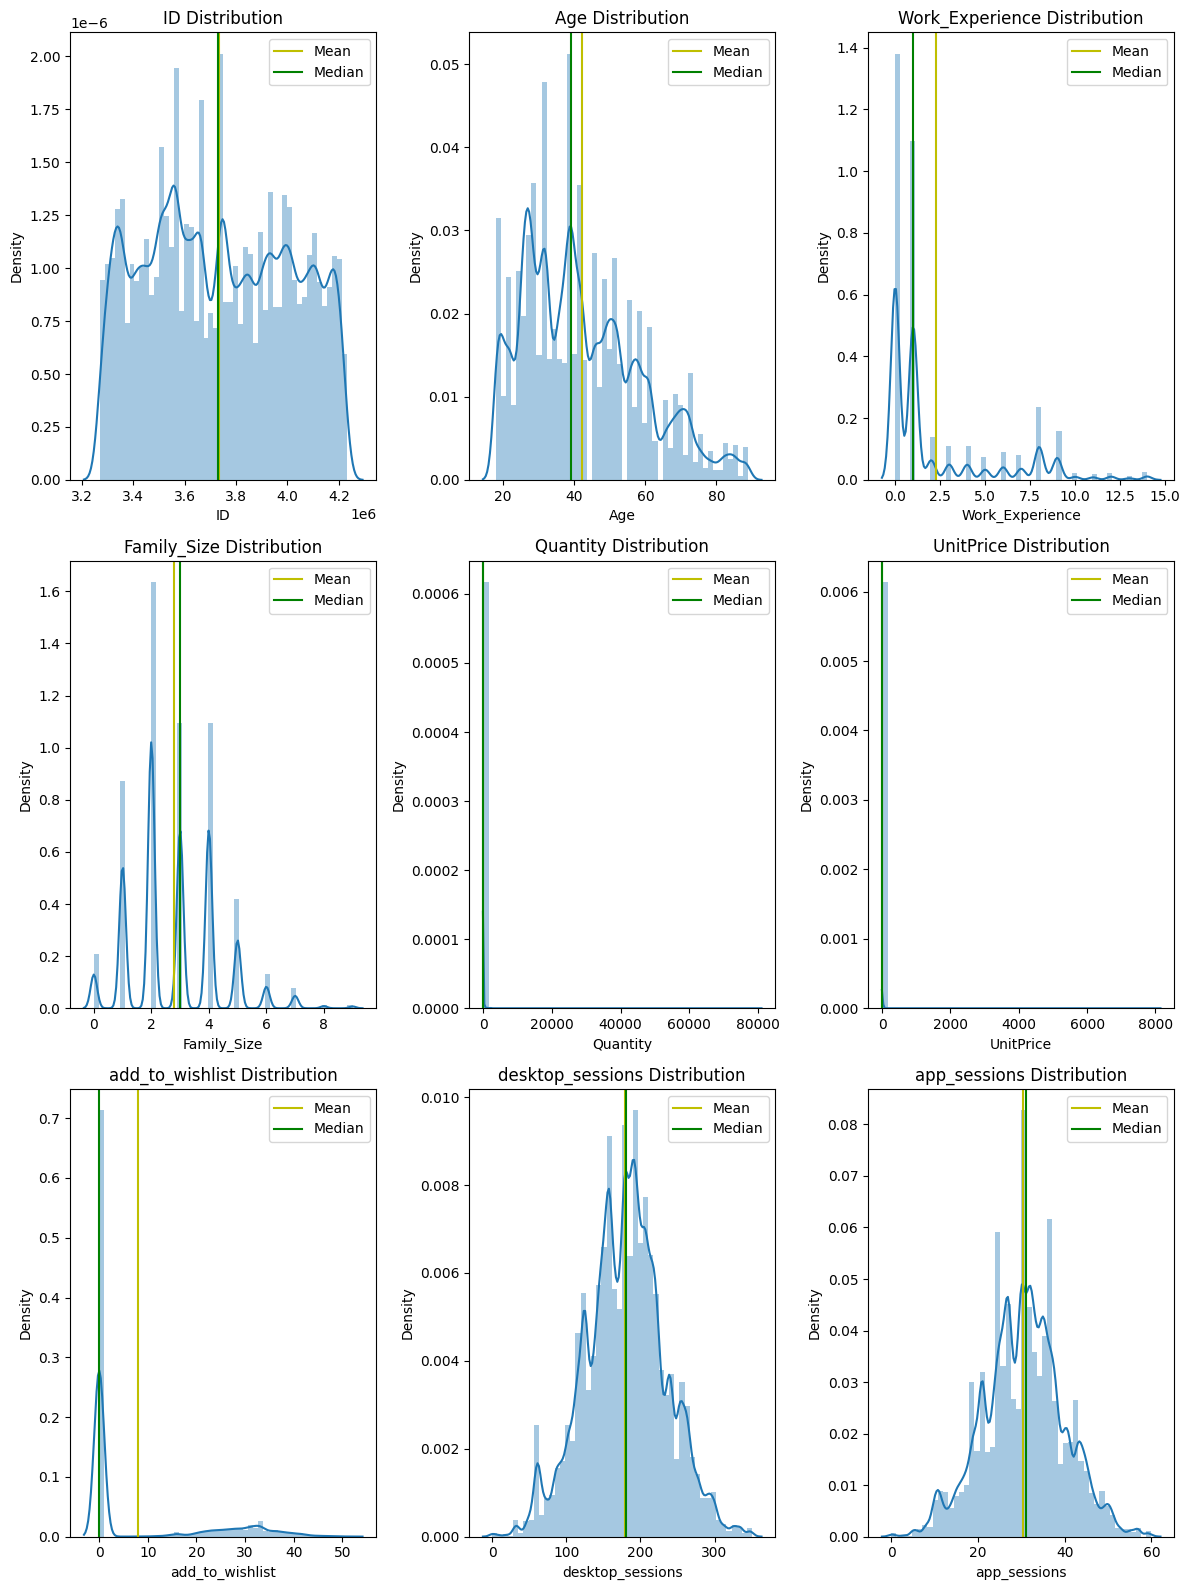

In [65]:
# plt.figure(figsize=(12,16))

# for i, j in enumerate(preprocessed_data2.describe().columns[:9]):
#     plt.subplot(3,3, i+1)
#     sns.distplot(x=preprocessed_data2[j])
#     plt.xlabel(j)
#     plt.title('{} Distribution'.format(j))
#     plt.axvline(preprocessed_data2[j].mean(), label='Mean', color='y')
#     plt.axvline(preprocessed_data2[j].median(), label='Median', color='g')
#     plt.subplots_adjust(wspace=.2, hspace=.5)
#     plt.legend()
#     plt.tight_layout()
# # plt.savefig('hist.png')
# plt.show()

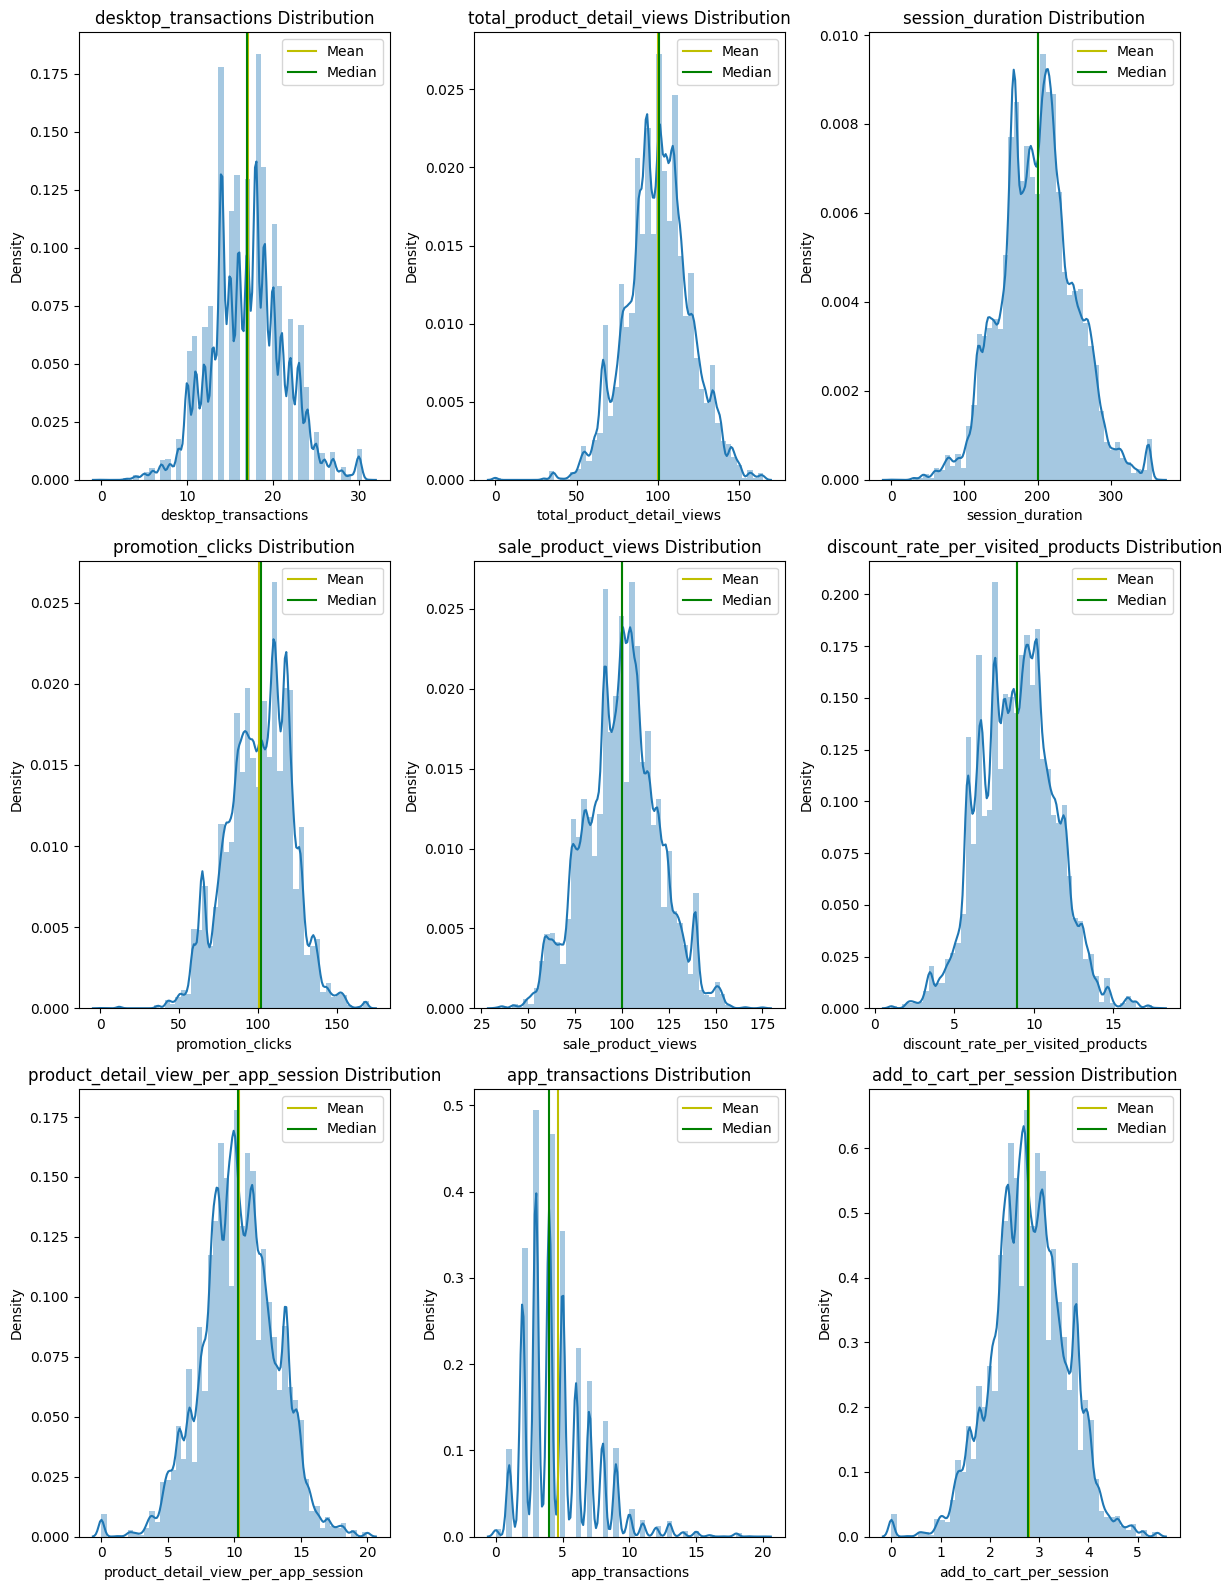

In [66]:
# plt.figure(figsize=(12,16))

# for i, j in enumerate(preprocessed_data2.describe().columns[9:18]):
#     plt.subplot(3,3, i+1)
#     sns.distplot(x=preprocessed_data2[j])
#     plt.xlabel(j)
#     plt.title('{} Distribution'.format(j))
#     plt.axvline(preprocessed_data2[j].mean(), label='Mean', color='y')
#     plt.axvline(preprocessed_data2[j].median(), label='Median', color='g')
#     plt.subplots_adjust(wspace=.2, hspace=.5)
#     plt.legend()
#     plt.tight_layout()
# # plt.savefig('hist.png')
# plt.show()

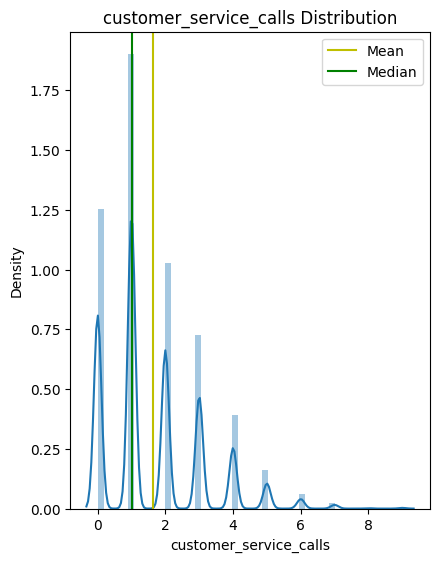

In [67]:
# plt.figure(figsize=(12,16))

# for i, j in enumerate(preprocessed_data2.describe().columns[18:]):
#     plt.subplot(3,3, i+1)
#     sns.distplot(x=preprocessed_data2[j])
#     plt.xlabel(j)
#     plt.title('{} Distribution'.format(j))
#     plt.axvline(preprocessed_data2[j].mean(), label='Mean', color='y')
#     plt.axvline(preprocessed_data2[j].median(), label='Median', color='g')
#     plt.subplots_adjust(wspace=.2, hspace=.5)
#     plt.legend()
#     plt.tight_layout()
# # plt.savefig('hist.png')
# plt.show()

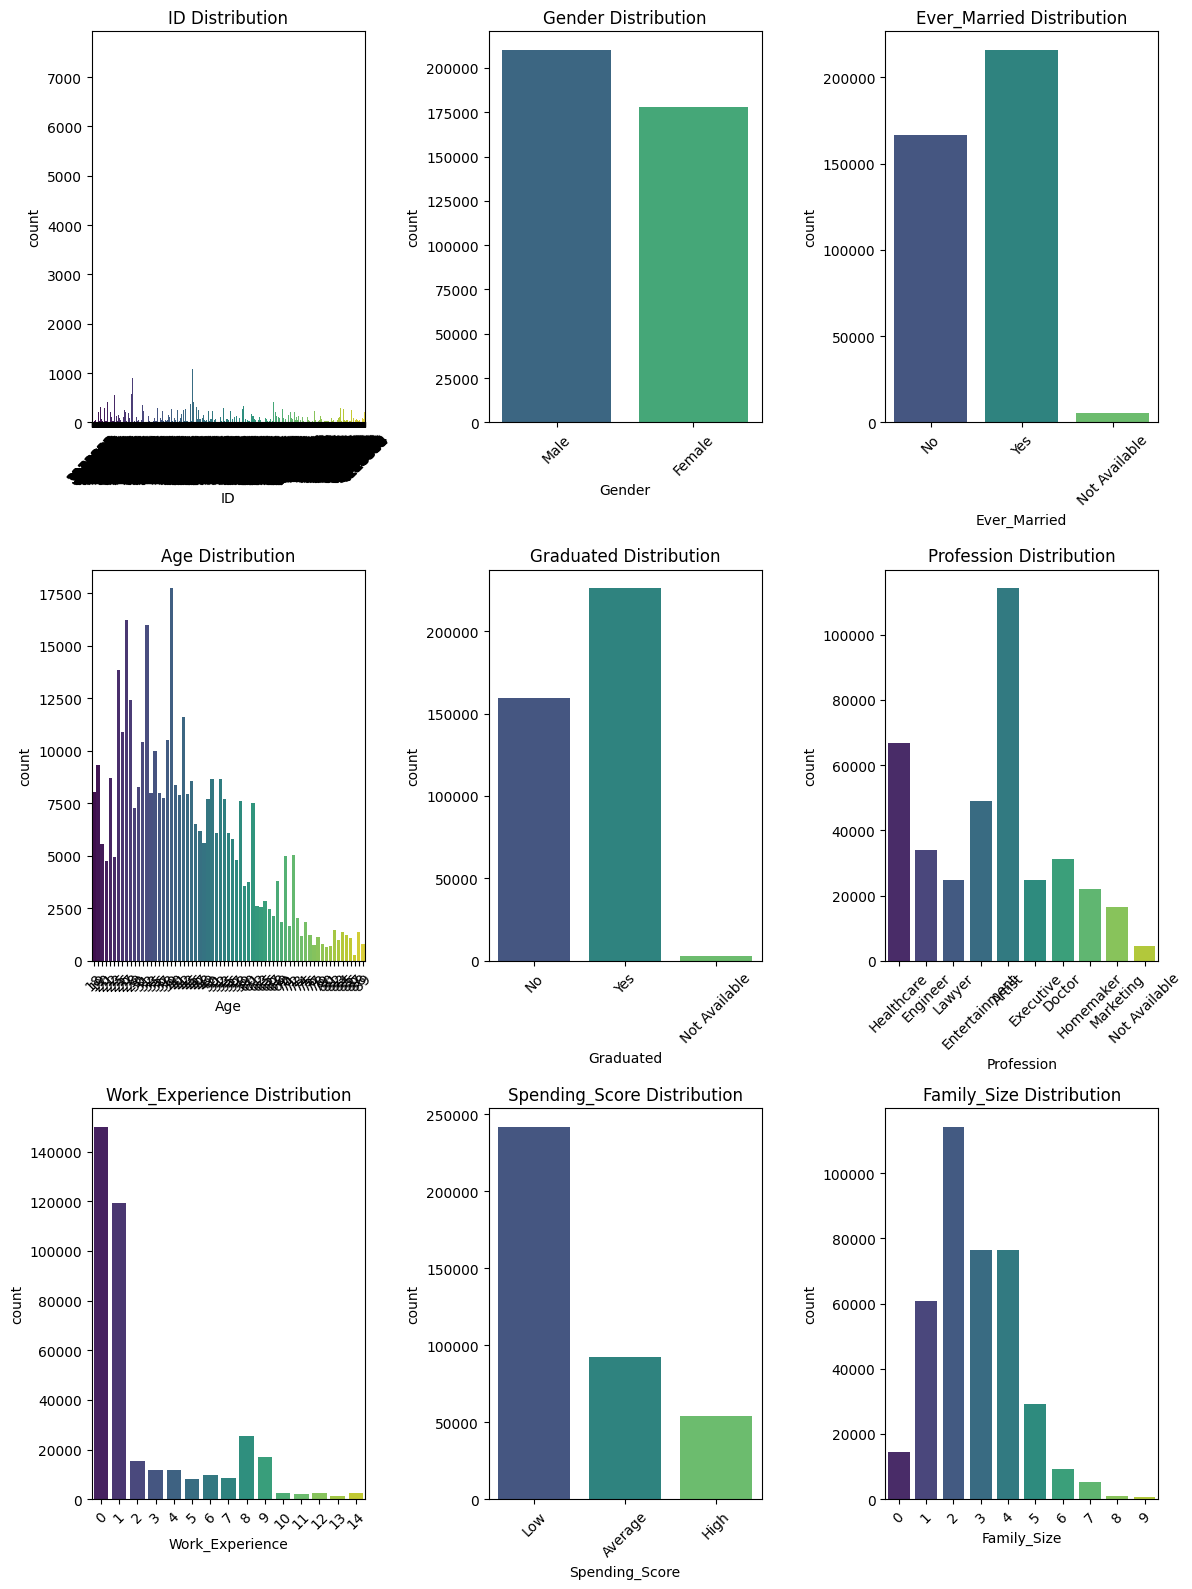

In [68]:
# plt.figure(figsize=(12,16))
# # customer_demographics_df2['Gender'].value_counts().plot(kind='bar', color='skyblue')
# # plt.figure(figsize=(8, 6))
# for i, j in enumerate(preprocessed_data2.describe(include='all').columns[:9]):

#     plt.subplot(3,3, i+1)
#     # sns.distplot(x=customer_demographics_df2[j])
#     sns.countplot(x=j, data=preprocessed_data2, palette='viridis')
#     plt.xlabel(j)
#     plt.title('{} Distribution'.format(j))
#     # plt.axvline(customer_demographics_df[j].mean(), label='Mean', color='y')
#     # plt.axvline(customer_demographics_df[j].median(), label='Median', color='g')
#     plt.subplots_adjust(wspace=.2, hspace=.5)
#     plt.xticks(rotation=45)
#     # plt.legend()
#     plt.tight_layout()

In [69]:
# preprocessed_data2[['ID','Gender','Ever_Married']]

,ID,Gender,Ever_Married
0,3824657,Male,No
1,3824657,Male,No
2,3824657,Male,No
3,3824657,Male,No
4,3824657,Male,No
...,...,...,...
387918,4004344,Male,Yes
387919,4004344,Male,Yes
387920,4004344,Male,Yes
387921,4004344,Male,Yes


In [70]:
preprocessed_data3 = preprocessed_data2[['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','ID','Country']].copy(deep=True)

In [71]:
len(preprocessed_data3.InvoiceNo.unique())
#18535 Distinct invoice numbers

18535

In [72]:
len(preprocessed_data3.StockCode.unique())
#3665 distinct stock codes

3665

In [73]:
len(preprocessed_data3.Description.unique())
#3877 distinct product names.
# There seems to be some duplicate names, stock codes and product names count should be the same ideally

3877

In [74]:
preprocessed_data4 = preprocessed_data3[['StockCode','Description']].copy(deep=True)
preprocessed_data4 = preprocessed_data4[~preprocessed_data4.duplicated(keep=False)]
result = preprocessed_data4.groupby('StockCode').size().reset_index(name='count')
result[result['count'] > 1]

,StockCode,count
78,35817P,2


In [75]:
preprocessed_data4 = preprocessed_data3[['StockCode','Description']].copy(deep=True)
# preprocessed_data4[preprocessed_data4.duplicated()]
preprocessed_data4.drop_duplicates(inplace=True)
preprocessed_data4
# I think the above duplicate code is wrong, or i didnt use it correctly

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
383957,23240,SET OF 4 KNICK KNACK TINS DOILEY
384311,23540,"WALL ART , THE MAGIC FOREST"
384481,23462,ROCOCO WALL MIROR
386391,35916B,BLUE FELT HANGING HEART WITH FLOWER


In [76]:
result = preprocessed_data4.groupby('StockCode').size().reset_index(name='count')
result = result[result['count'] > 1]

In [77]:
result2 = pd.merge(result, preprocessed_data4, on='StockCode', how='left')
result2
# Here we can see that stock codes have multiple description. So its better if we take stock code for our analysis and not description. We can do an mapping table to understand which stock code is for which index

,StockCode,count,Description
0,16156L,2,WRAP CAROUSEL
1,16156L,2,"WRAP, CAROUSEL"
2,17107D,3,"FLOWER FAIRY,5 SUMMER B'DRAW LINERS"
3,17107D,3,FLOWER FAIRY 5 DRAWER LINERS
4,17107D,3,FLOWER FAIRY 5 SUMMER DRAW LINERS
...,...,...,...
440,90014A,2,SILVER M.O.P. ORBIT NECKLACE
441,90014B,2,GOLD M.O.P. ORBIT NECKLACE
442,90014B,2,GOLD M PEARL ORBIT NECKLACE
443,90014C,2,SILVER AND BLACK ORBIT NECKLACE


In [78]:
# preprocessed_data3.Quantity.unique()
#Plot a histogram to understand how many rows have how many quantities.
# Check if there are any particular products that are getting purchased in the same quantity.
# Check if there are any product if they are getting purchased a lot, very less. See for outliers

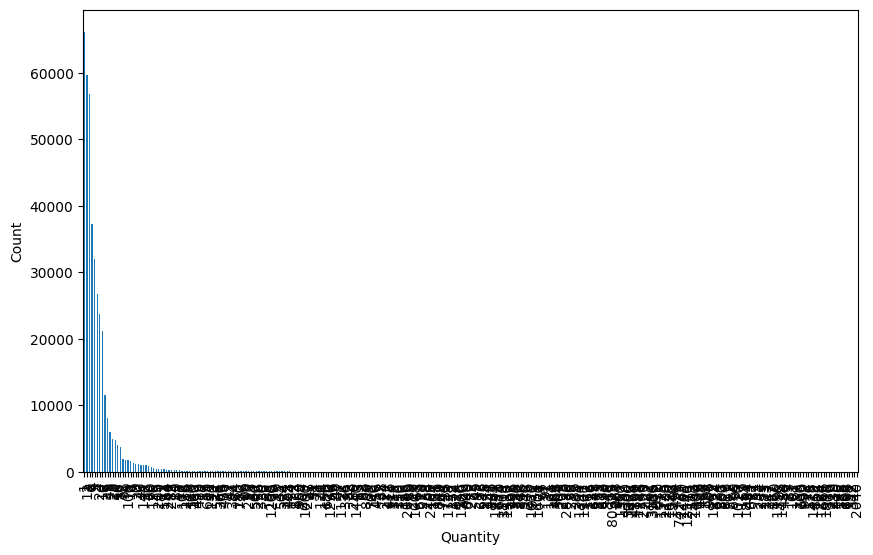

In [79]:
preprocessed_data3['Quantity'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()
# Data seems skewed

In [80]:
preprocessed_data3[preprocessed_data3['Quantity'] > 10000]
# These are the three transactions that had huge purchases. Lets deep dive each invoice number to see what other items were purchased and at what quantity.
# Also lets see how was the purchase quantity for this comodity by other customers
# Also lets see the history of this customers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,ID,Country
215656,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.00,3549062,United Kingdom
242756,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,3761677,United Kingdom
352496,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/09/2011 09:15,2.08,3676136,United Kingdom


In [81]:
preprocessed_data3[preprocessed_data3['InvoiceNo'] == '581483']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,ID,Country
352496,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/09/2011 09:15,2.08,3676136,United Kingdom


In [82]:
preprocessed_data3[preprocessed_data3['InvoiceNo'] == '541431']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,ID,Country
242756,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,3761677,United Kingdom


In [83]:
preprocessed_data3[preprocessed_data3['InvoiceNo'] == '578841']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,ID,Country
215656,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.0,3549062,United Kingdom


In [84]:
#Seems like these invoice number had only one parituclar item was purchased, but in bulk.

In [85]:
preprocessed_data3[preprocessed_data3['StockCode'] == '84826']
#Seems like this commodity is purchased in huge quantity but not this huge as well

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,ID,Country
15446,540122,84826,ASSTD DESIGN 3D PAPER STICKERS,60,01/05/2011 10:39,0.21,3533305,United Kingdom
48763,536620,84826,ASSTD DESIGN 3D PAPER STICKERS,60,12/02/2010 10:27,0.85,3374697,United Kingdom
138166,539472,84826,ASSTD DESIGN 3D PAPER STICKERS,2,12/19/2010 14:23,0.85,4117778,United Kingdom
138214,551137,84826,ASSTD DESIGN 3D PAPER STICKERS,1,4/26/2011 13:05,0.85,4117778,United Kingdom
160431,562539,84826,ASSTD DESIGN 3D PAPER STICKERS,12,08/05/2011 15:30,0.85,3419443,United Kingdom
179710,538801,84826,ASSTD DESIGN 3D PAPER STICKERS,60,12/14/2010 11:51,0.21,3946577,United Kingdom
184778,538870,84826,ASSTD DESIGN 3D PAPER STICKERS,60,12/14/2010 14:54,0.21,3609038,United Kingdom
184783,540420,84826,ASSTD DESIGN 3D PAPER STICKERS,120,01/07/2011 11:13,0.21,3609038,United Kingdom
186005,538895,84826,ASSTD DESIGN 3D PAPER STICKERS,60,12/15/2010 9:07,0.21,3894083,United Kingdom
187308,575336,84826,ASSTD DESIGN 3D PAPER STICKERS,4,11/09/2011 13:58,0.85,3784013,United Kingdom


In [86]:
preprocessed_data3[preprocessed_data3['StockCode'] == '23166'].nunique()

InvoiceNo      195
StockCode        1
Description      1
Quantity        18
InvoiceDate    195
UnitPrice        2
ID             136
Country         10
dtype: int64

In [87]:
preprocessed_data3[preprocessed_data3['StockCode'] == '23166']['Quantity'].unique()
# Same with this comodity too, it seems like only one transaction had lots of purchases

array([   12,     1,    48,     2,     3,     6,     4,    10,   288,
           5,    24,    96,   240,   144,     8, 74215,    14,     9],
      dtype=int64)

In [88]:
preprocessed_data3[preprocessed_data3['StockCode'] == '23843']
# Seems like there was only one purchase ever done on this stock code.
# Its safe to assume that this company has sold all of its units to another company

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,ID,Country
352496,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/09/2011 09:15,2.08,3676136,United Kingdom


In [89]:
preprocessed_data3[preprocessed_data3['ID'] == 3549062].nunique()
#Seems like this customer has made some good number of times purchases

InvoiceNo      35
StockCode      46
Description    46
Quantity       32
InvoiceDate    35
UnitPrice      29
ID              1
Country         1
dtype: int64

In [90]:
preprocessed_data3[preprocessed_data3['ID'] == 3549062]['Quantity'].unique()

array([    6,    12,    30,    18,    16,    48,    36,    96,    64,
          24,   108,    10,    20,    42,    54,    60,    78,   114,
         192,   150,   198,    84,    66,   140,   264,   336,   144,
          50, 12540,   100,   186,   240], dtype=int64)

In [91]:
preprocessed_data3[preprocessed_data3['ID'] == 3549062]['InvoiceDate'].unique()

array(['01/12/2011 15:48', '1/14/2011 9:54', '1/26/2011 13:38',
       '1/31/2011 15:57', '2/18/2011 10:07', '03/03/2011 12:00',
       '03/08/2011 12:51', '04/08/2011 14:39', '4/15/2011 16:46',
       '5/18/2011 14:07', '5/18/2011 14:08', '5/19/2011 17:23',
       '5/24/2011 15:51', '06/07/2011 15:44', '6/15/2011 12:15',
       '6/22/2011 15:30', '6/29/2011 9:09', '07/06/2011 15:02',
       '7/14/2011 9:26', '7/17/2011 13:54', '7/18/2011 12:49',
       '7/28/2011 12:15', '08/03/2011 10:12', '08/10/2011 14:51',
       '09/05/2011 10:00', '9/26/2011 13:35', '11/01/2011 09:26',
       '11/03/2011 15:47', '11/07/2011 11:16', '11/10/2011 15:51',
       '11/25/2011 13:59', '11/25/2011 15:57', '12/06/2011 16:33',
       '12/06/2011 16:35', '12/09/2011 09:38'], dtype=object)

In [92]:
preprocessed_data3[preprocessed_data3['ID'] == 3761677]['Quantity'].unique()

array([74215], dtype=int64)

In [93]:
preprocessed_data3[preprocessed_data3['ID'] == 3676136]['Quantity'].unique()

array([    1, 80995], dtype=int64)

In [94]:
preprocessed_data3[preprocessed_data3['ID'] == 3676136]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,ID,Country
352494,553573,22980,PANTRY SCRUBBING BRUSH,1,5/18/2011 9:52,1.65,3676136,United Kingdom
352495,553573,22982,PANTRY PASTRY BRUSH,1,5/18/2011 9:52,1.25,3676136,United Kingdom
352496,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/09/2011 09:15,2.08,3676136,United Kingdom


In [95]:
# Okay i think its safe to assume that we can drop those three rows

In [96]:
preprocessed_data2 = preprocessed_data2[preprocessed_data2['Quantity'] < 10000]

In [97]:
preprocessed_data3 = preprocessed_data2[['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','ID','Country']].copy(deep=True)

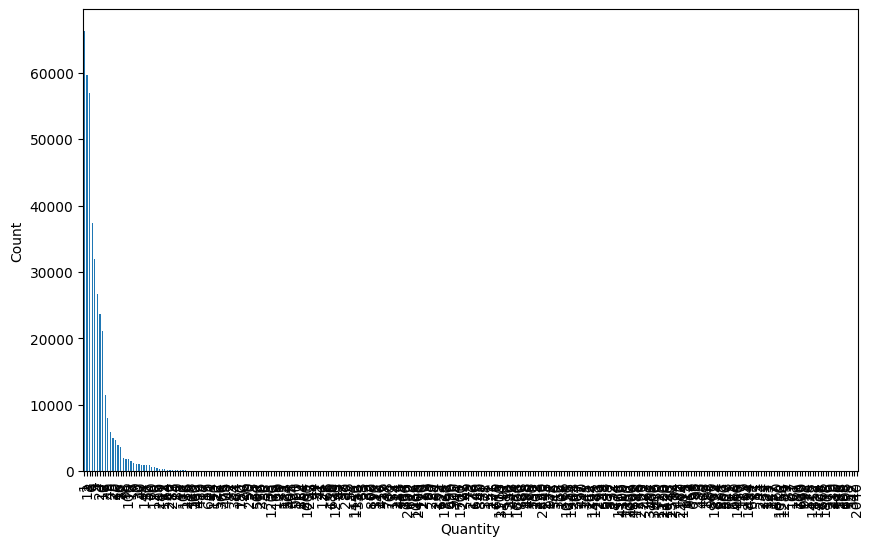

In [98]:
preprocessed_data3['Quantity'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

In [99]:
preprocessed_data3[preprocessed_data3['Quantity'] > 1000].nunique()

InvoiceNo      79
StockCode      54
Description    55
Quantity       45
InvoiceDate    79
UnitPrice      40
ID             40
Country         5
dtype: int64

In [100]:
preprocessed_data3[(preprocessed_data3['Quantity'] < 1000) & (preprocessed_data3['Quantity'] > 100)].nunique()

InvoiceNo      1761
StockCode      1166
Description    1193
Quantity        162
InvoiceDate    1735
UnitPrice       191
ID              559
Country          22
dtype: int64

In [101]:
# It seems like we will be loosing a lot of invoices if we delete data. Lets come back later to see if we need to delete these

In [102]:
preprocessed_data3.InvoiceDate.unique()
# Need to check the range of dates we have the data for.
# Also need to see if we can convert this date to month,year,day.
# Based on invoice id check how many customers are visiting stores on every day of the week, every month, every year.
# Based on quantity, check how much revenue you are making per day, week, year and draw a bar graph or something to see the trend.

array(['12/01/2010 08:26', '12/01/2010 08:28', '12/01/2010 09:01', ...,
       '8/25/2011 11:09', '8/25/2011 11:27', '8/25/2011 11:59'],
      dtype=object)

In [103]:
preprocessed_data3['InvoiceDate'] = pd.to_datetime(preprocessed_data3['InvoiceDate'])

In [104]:
preprocessed_data3['InvoiceMonth'] = preprocessed_data3['InvoiceDate'].dt.month

In [105]:
preprocessed_data3['InvoiceYear'] = preprocessed_data3['InvoiceDate'].dt.year

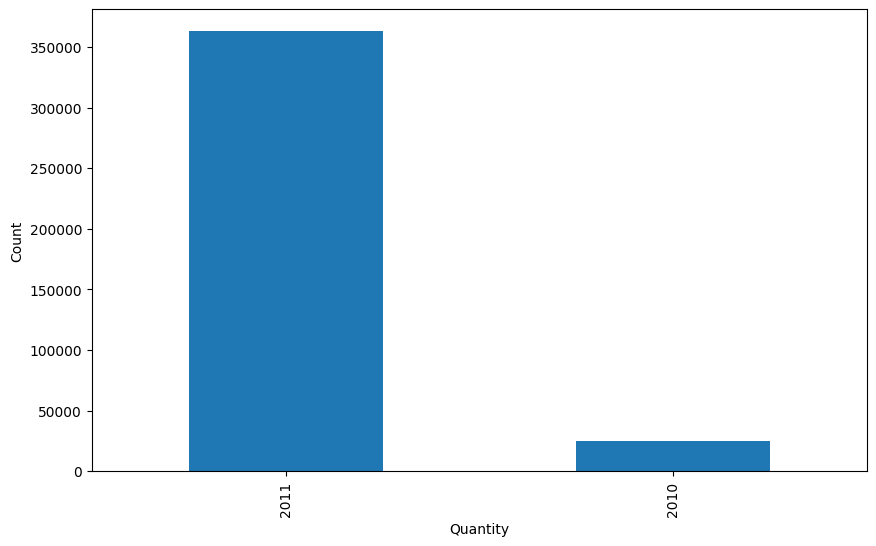

In [106]:
preprocessed_data3['InvoiceYear'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

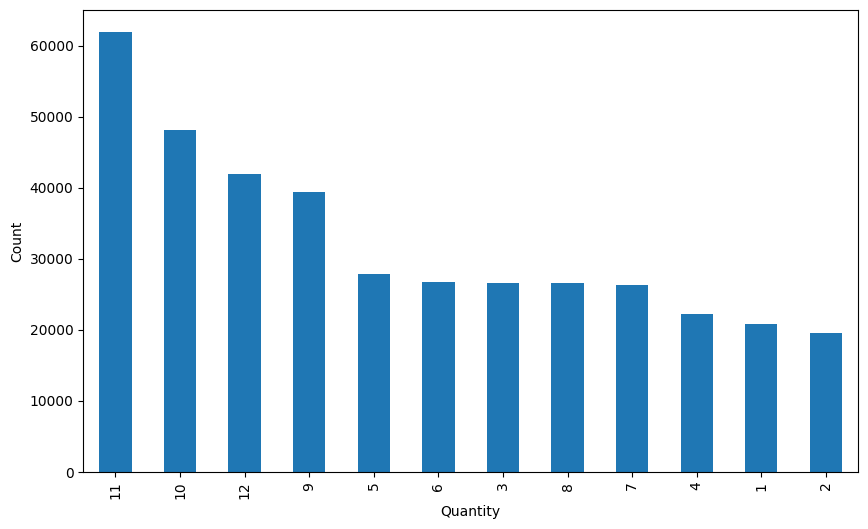

In [107]:
preprocessed_data3['InvoiceMonth'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

In [108]:
# result = preprocessed_data3.groupby(['InvoiceYear', 'InvoiceMonth']).sum()
preprocessed_data4 = preprocessed_data3.copy(deep=True)
preprocessed_data4['InvoiceYear'] = preprocessed_data4['InvoiceYear'].astype(str)
preprocessed_data4['InvoiceMonth'] = preprocessed_data4['InvoiceMonth'].astype(str)

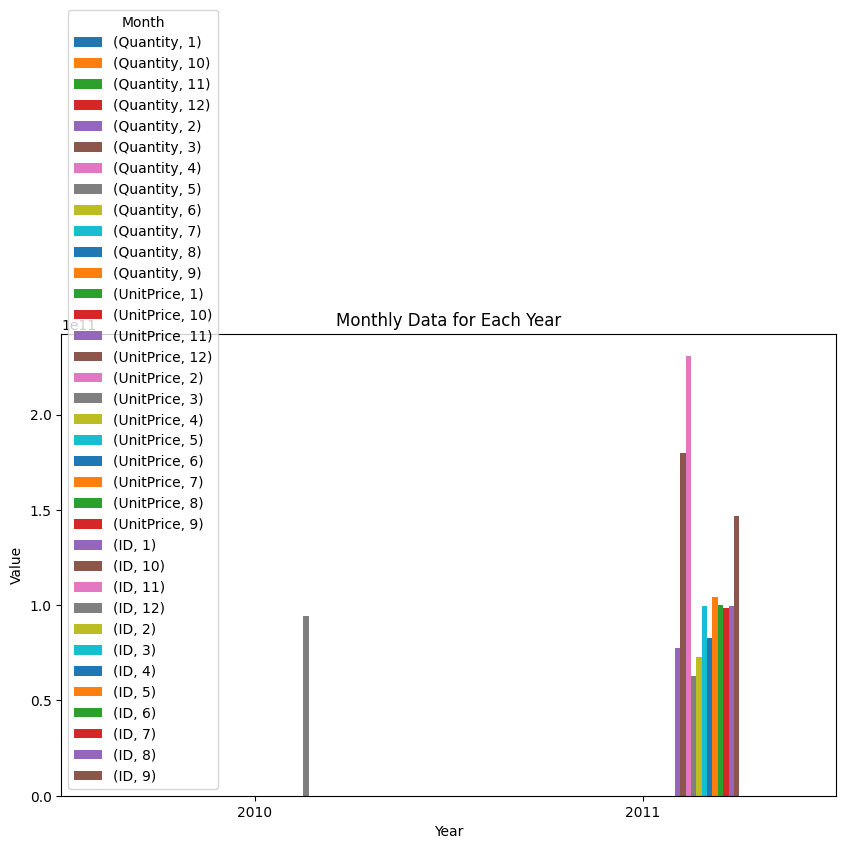

In [109]:
result = preprocessed_data4[['InvoiceYear', 'InvoiceMonth','InvoiceNo','StockCode','Description','Quantity','UnitPrice','ID','Country']].groupby(['InvoiceYear', 'InvoiceMonth']).sum()

# Unstack the DataFrame to pivot the 'month' index to columns
grouped_unstacked = result.unstack(level='InvoiceMonth')

# Plot the bar graph
grouped_unstacked.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Monthly Data for Each Year')
plt.xticks(rotation=0)
plt.legend(title='Month')
plt.show()

In [110]:
result = preprocessed_data4[['InvoiceYear', 'InvoiceMonth','InvoiceNo','StockCode','Description','Quantity','UnitPrice','ID','Country']].groupby(['InvoiceYear', 'InvoiceMonth']).sum()


In [111]:
result['InvoiceYear', 'InvoiceMonth'].count()

KeyError: ('InvoiceYear', 'InvoiceMonth')

In [128]:
preprocessed_data4['InvoiceYear-Month'] = preprocessed_data4['InvoiceYear'].astype('str') + '-' + preprocessed_data4['InvoiceMonth'].astype('str')

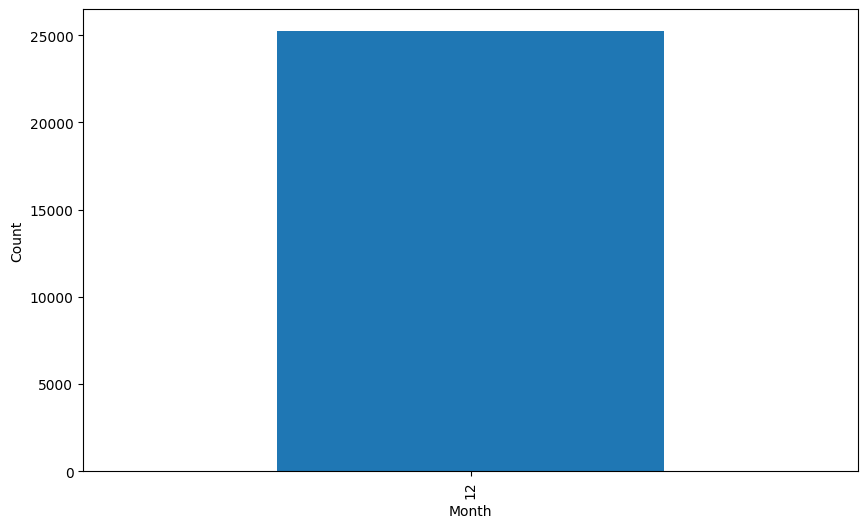

In [116]:
preprocessed_data3[preprocessed_data3['InvoiceYear'] == 2010]['InvoiceMonth'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

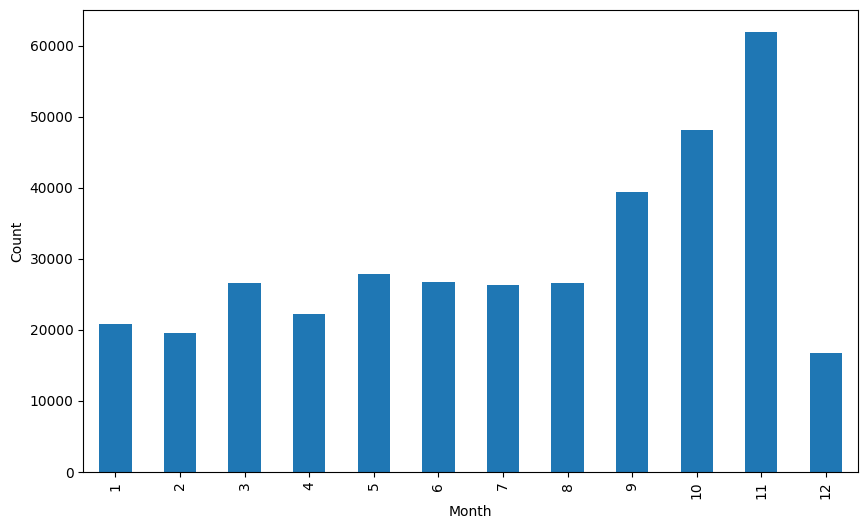

In [126]:
preprocessed_data3[preprocessed_data3['InvoiceYear'] == 2011]['InvoiceMonth'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

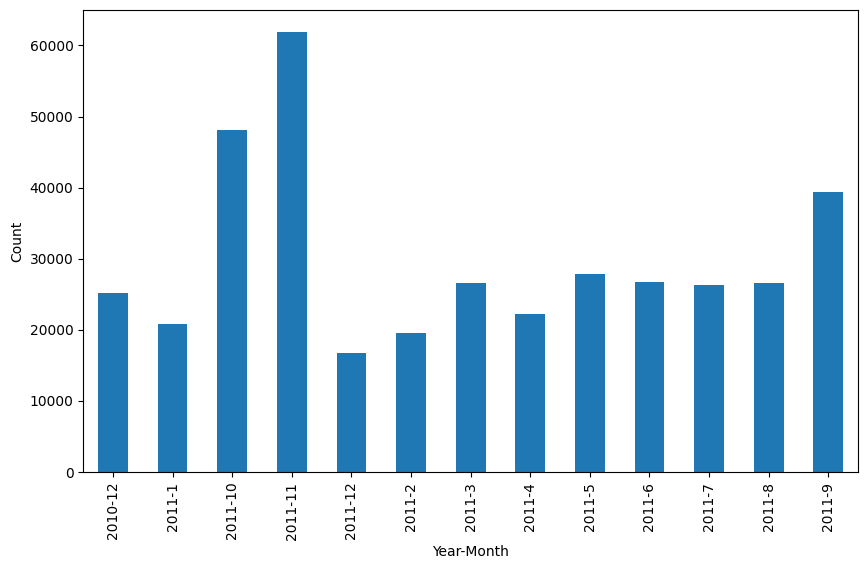

In [129]:
preprocessed_data4['InvoiceYear-Month'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.show()

In [132]:
preprocessed_data3['InvoiceDoW'] = preprocessed_data3['InvoiceDate'].dt.dayofweek
#0 is monday, #1 is tuesday

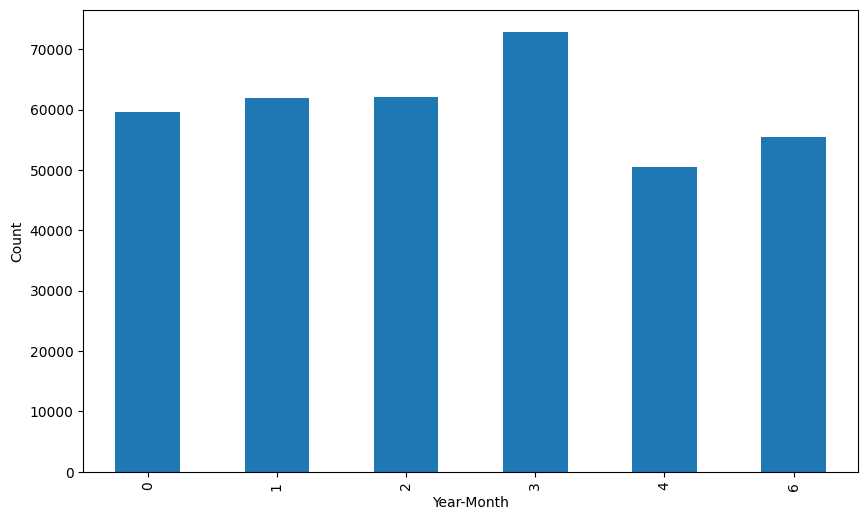

In [142]:
preprocessed_data3[preprocessed_data3['InvoiceYear'] == 2011]['InvoiceDoW'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.show()

In [137]:
preprocessed_data3['InvoiceWeek'] = preprocessed_data3['InvoiceDate'].dt.isocalendar().week

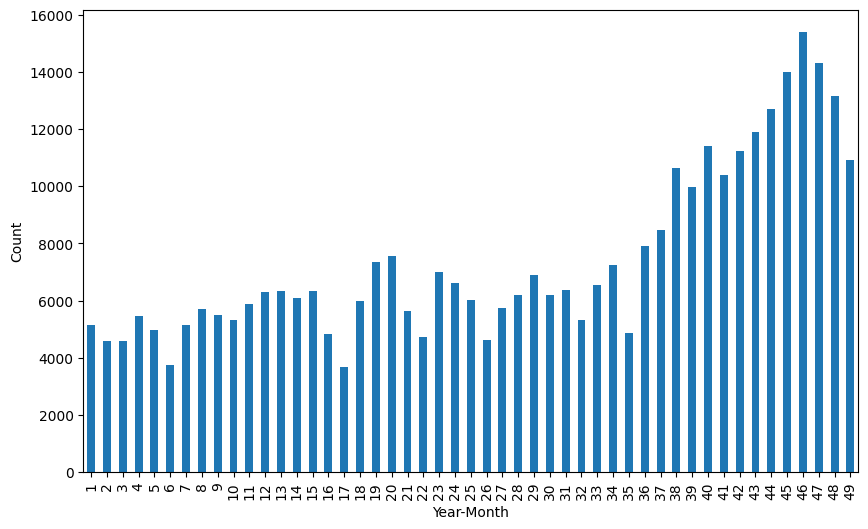

In [143]:
preprocessed_data3[preprocessed_data3['InvoiceYear'] == 2011]['InvoiceWeek'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.show()

In [140]:
preprocessed_data3['InvoiceQuarter'] = preprocessed_data3['InvoiceDate'].dt.quarter

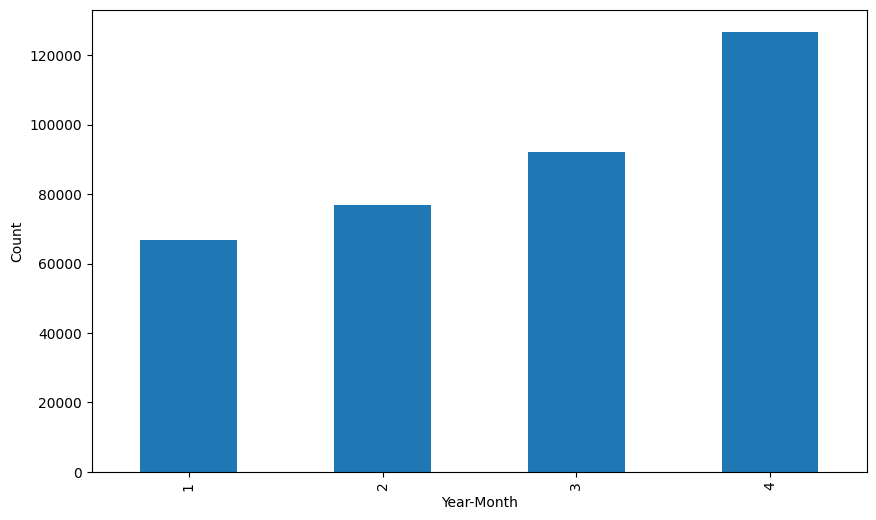

In [144]:
preprocessed_data3[preprocessed_data3['InvoiceYear'] == 2011]['InvoiceQuarter'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.show()

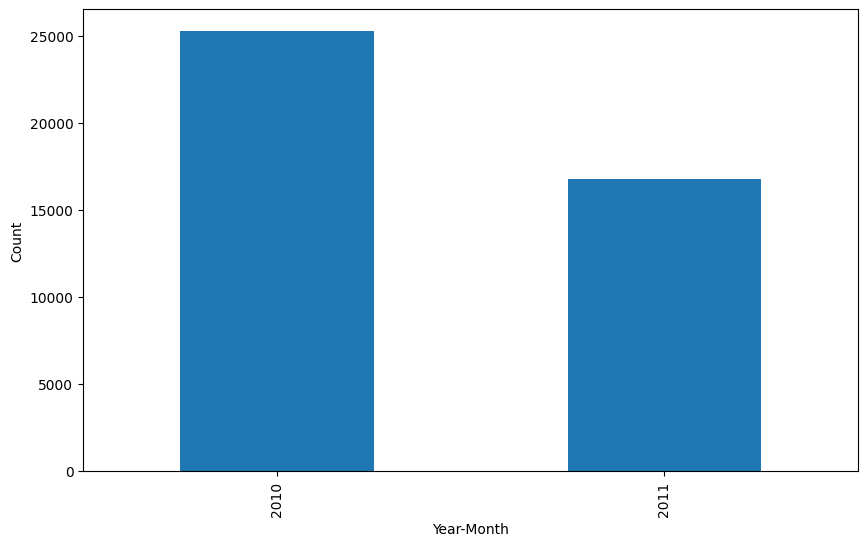

In [145]:
preprocessed_data3[preprocessed_data3['InvoiceMonth'] == 12]['InvoiceYear'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.show()

In [166]:
temp = preprocessed_data3.groupby(by=['ID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket[:].sort_values('ID')

,ID,InvoiceNo,Number of products
0,3271058,562525,7
1,3271058,580173,5
26,3271319,551351,128
27,3271319,551747,58
28,3271319,555284,105
...,...,...,...
18526,4229964,549961,1
18527,4229964,552819,23
18528,4229964,563954,31
18529,4229964,563955,3


In [163]:
pd.DataFrame([{'products': len(preprocessed_data3['StockCode'].value_counts()),    
               'transactions': len(preprocessed_data3['InvoiceNo'].value_counts()),
               'customers': len(preprocessed_data3['ID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

# It can be seen that the data concern 4372 users and that they bought 3684 different products. The total number of transactions carried out is of the order of  ∼
#  22'000.

,products,transactions,customers
quantity,3664,18532,3320


In [148]:
temp = preprocessed_data3[['ID', 'InvoiceNo', 'Country']].groupby(['ID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print('Number of countries in dataframe: {}'.format(len(countries)))

Number of countries in dataframe: 37


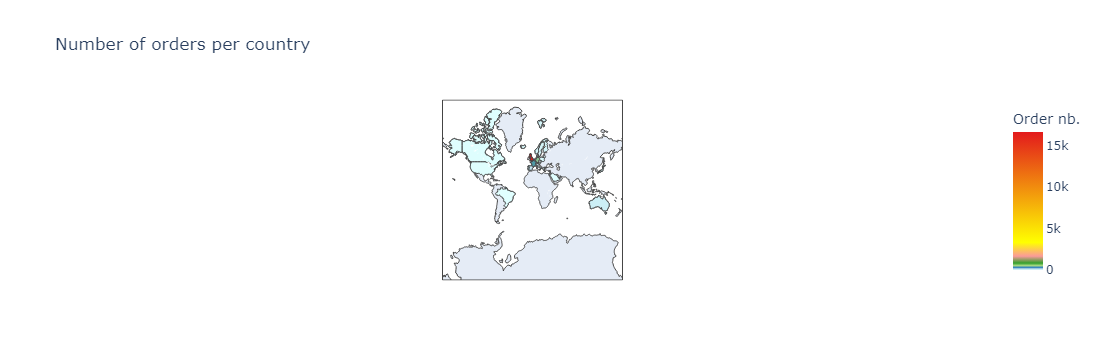

In [157]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

data = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],
    # height=800,
    # width=1200,
reversescale = False
           )

layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

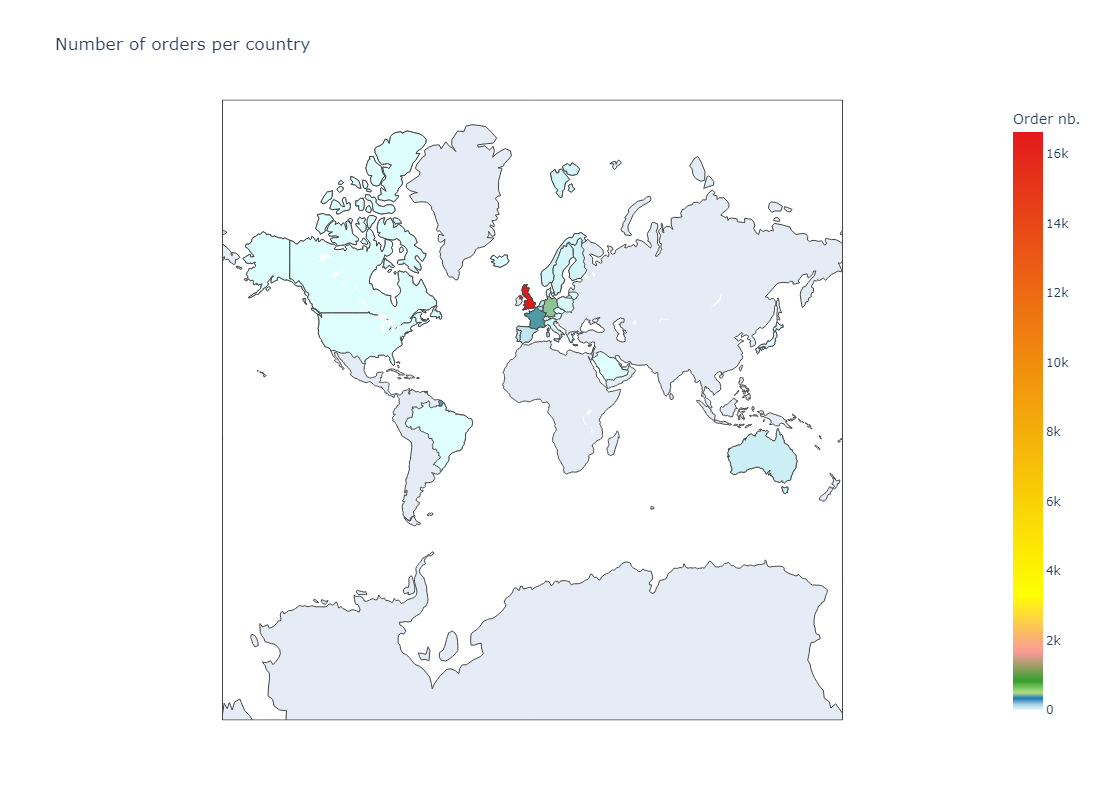

In [158]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

data = dict(
    type='choropleth',
    locations=countries.index,
    locationmode='country names',
    z=countries,
    text=countries.index,
    colorbar={'title': 'Order nb.'},
    colorscale=[
        [0, 'rgb(224,255,255)'],
        [0.01, 'rgb(166,206,227)'],
        [0.02, 'rgb(31,120,180)'],
        [0.03, 'rgb(178,223,138)'],
        [0.05, 'rgb(51,160,44)'],
        [0.10, 'rgb(251,154,153)'],
        [0.20, 'rgb(255,255,0)'],
        [1, 'rgb(227,26,28)']
    ],
    reversescale=False
)

layout = dict(
    title='Number of orders per country',
    geo=dict(
        showframe=True,
        projection={'type': 'mercator'}
    ),
    height=800,  # Adjust the height
    width=1200    # Adjust the width
)

choromap = go.Figure(data=[data], layout=layout)
iplot(choromap, validate=False)

In [171]:
preprocessed_data3['order_canceled'] = preprocessed_data3['InvoiceNo'].apply(lambda x:int('C' in x))
display(preprocessed_data3[:5])
n1 = preprocessed_data3['order_canceled'].sum()
n2 = preprocessed_data3.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

Number of orders canceled: 0/387920 (0.00%) 


In [184]:
list_special_codes = preprocessed_data3[preprocessed_data3['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

# Above, it has been seen that some values of the StockCode variable indicate a particular transaction (i.e. D for Discount).
# I check the contents of this variable by looking for the set of codes that would contain only letters:

array(['M', 'POST', 'DOT', 'C2', 'BANK CHARGES', 'PADS'], dtype=object)

In [185]:
for code in list_special_codes:
    print("{:<15} -> {:<30}".format(code, preprocessed_data3[preprocessed_data3['StockCode'] == code]['Description'].unique()[0]))

# We see that there are several types of peculiar transactions, connected e.g. to port charges or bank charges.

M               -> Manual                        
POST            -> POSTAGE                       
DOT             -> DOTCOM POSTAGE                
C2              -> CARRIAGE                      
BANK CHARGES    -> Bank Charges                  
PADS            -> PADS TO MATCH ALL CUSHIONS    


In [186]:
preprocessed_data3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,ID,Country,InvoiceMonth,InvoiceYear,InvoiceDoW,InvoiceWeek,InvoiceQuarter,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,3824657,United Kingdom,12,2010,2,48,4,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,3824657,United Kingdom,12,2010,2,48,4,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,3824657,United Kingdom,12,2010,2,48,4,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,3824657,United Kingdom,12,2010,2,48,4,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,3824657,United Kingdom,12,2010,2,48,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387918,564434,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,48,2011-08-25 11:59:00,1.45,4004344,United Kingdom,8,2011,3,34,3,0
387919,564434,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,8,2011-08-25 11:59:00,2.95,4004344,United Kingdom,8,2011,3,34,3,0
387920,564434,21770,OPEN CLOSED METAL SIGN,2,2011-08-25 11:59:00,4.95,4004344,United Kingdom,8,2011,3,34,3,0
387921,564434,22671,FRENCH LAUNDRY SIGN BLUE METAL,12,2011-08-25 11:59:00,1.65,4004344,United Kingdom,8,2011,3,34,3,0


In [187]:
df_cleaned = preprocessed_data3.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  preprocessed_data3.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = preprocessed_data3[(preprocessed_data3['CustomerID'] == col['CustomerID']) &
                         (preprocessed_data3['StockCode']  == col['StockCode']) & 
                         (preprocessed_data3['InvoiceDate'] < col['InvoiceDate']) & 
                         (preprocessed_data3['Quantity']   > 0)].copy()
    #_________________________________
    # Cancelation WITHOUT counterpart
    if (preprocessed_data3.shape[0] == 0): 
        doubtfull_entry.append(index)
    #________________________________
    # Cancelation WITH a counterpart
    elif (preprocessed_data3.shape[0] == 1): 
        index_order = preprocessed_data3.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
    #______________________________________________________________
    # Various counterparts exist in orders: we delete the last one
    elif (preprocessed_data3.shape[0] > 1): 
        preprocessed_data3.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in preprocessed_data3.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break  

In [191]:
df_cleaned[df_cleaned['QuantityCanceled'] != 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,ID,Country,InvoiceMonth,InvoiceYear,InvoiceDoW,InvoiceWeek,InvoiceQuarter,order_canceled,QuantityCanceled


In [193]:
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])
df_cleaned.sort_values('ID')[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,ID,Country,InvoiceMonth,InvoiceYear,InvoiceDoW,InvoiceWeek,InvoiceQuarter,order_canceled,QuantityCanceled,TotalPrice
383352,580173,23174,REGENCY SUGAR BOWL GREEN,4,2011-12-02 11:43:00,4.15,3271058,United Kingdom,12,2011,4,48,4,0,0,16.60
383353,580173,23175,REGENCY MILK JUG PINK,4,2011-12-02 11:43:00,3.25,3271058,United Kingdom,12,2011,4,48,4,0,0,13.00
383351,580173,22818,CARD CHRISTMAS VILLAGE,12,2011-12-02 11:43:00,0.42,3271058,United Kingdom,12,2011,4,48,4,0,0,5.04
383350,580173,22699,ROSES REGENCY TEACUP AND SAUCER,6,2011-12-02 11:43:00,2.95,3271058,United Kingdom,12,2011,4,48,4,0,0,17.70
383348,562525,22424,ENAMEL BREAD BIN CREAM,1,2011-08-05 13:35:00,12.75,3271058,United Kingdom,8,2011,4,31,3,0,0,12.75


In [196]:
#___________________________________________
# somme des achats / utilisateur & commande
temp = df_cleaned.groupby(by=['ID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'Basket Price'})
#_____________________
# date de la commande
df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
temp = df_cleaned.groupby(by=['ID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
#______________________________________
# selection des entrées significatives:
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('ID')[:6]

,ID,InvoiceNo,Basket Price,InvoiceDate
0,3271058,562525,100.21,2011-08-05 13:35:00
1,3271058,580173,77.84,2011-12-02 11:43:00
26,3271319,551351,4390.56,2011-04-28 10:20:00
27,3271319,551747,2805.28,2011-05-04 11:00:00
28,3271319,555284,3056.72,2011-06-02 09:37:00
29,3271319,555285,362.70,2011-06-02 09:38:00


#### Instead of Invoice Date, we can take Invoice Year,Month,Date,Week,Quarter and country and see the revenue
#### We can also take remove invoice no and basket price and see how is our customer base across different countries

In [197]:
basket_price

,ID,InvoiceNo,Basket Price,InvoiceDate
0,3271058,562525,100.21,2011-08-05 13:35:00
1,3271058,580173,77.84,2011-12-02 11:43:00
2,3271319,538827,2594.76,2010-12-14 12:59:00
3,3271319,538828,231.84,2010-12-14 13:00:00
4,3271319,538830,146.46,2010-12-14 13:01:00
...,...,...,...,...
18527,4229964,552819,1440.96,2011-05-11 12:50:00
18528,4229964,563954,1388.27,2011-08-22 10:59:00
18529,4229964,563955,82.98,2011-08-22 11:00:00
18530,4229964,570701,2159.30,2011-10-12 09:35:00


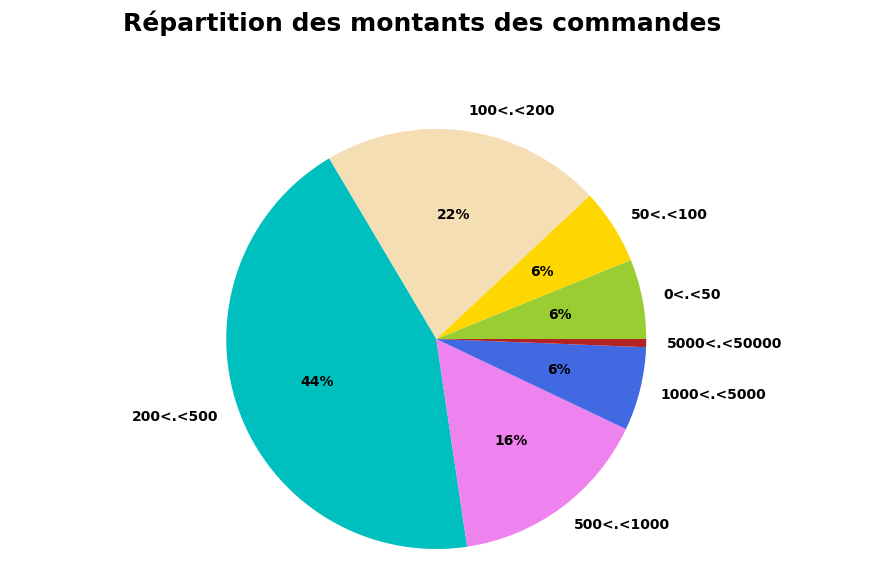

In [198]:

price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = basket_price[(basket_price['Basket Price'] < price) &
                       (basket_price['Basket Price'] > price_range[i-1])]['Basket Price'].count()
    count_price.append(val)
#____________________________________________
# Représentation du nombre d'achats / montant        
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Répartition des montants des commandes", ha='center', fontsize = 18);

In [205]:
import datetime, nltk, warnings

# import nltk
# nltk.download('punkt')

is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("Nb of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [200]:
preprocessed_data4 = preprocessed_data3.copy(deep=True)


df_products = pd.DataFrame(preprocessed_data4['Description'].unique()).rename(columns = {0:'Description'})

In [201]:
df_products

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
3871,SET OF 4 KNICK KNACK TINS DOILEY
3872,"WALL ART , THE MAGIC FOREST"
3873,ROCOCO WALL MIROR
3874,BLUE FELT HANGING HEART WITH FLOWER


In [210]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_products)

Nb of keywords in variable 'Description': 1476


In [211]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

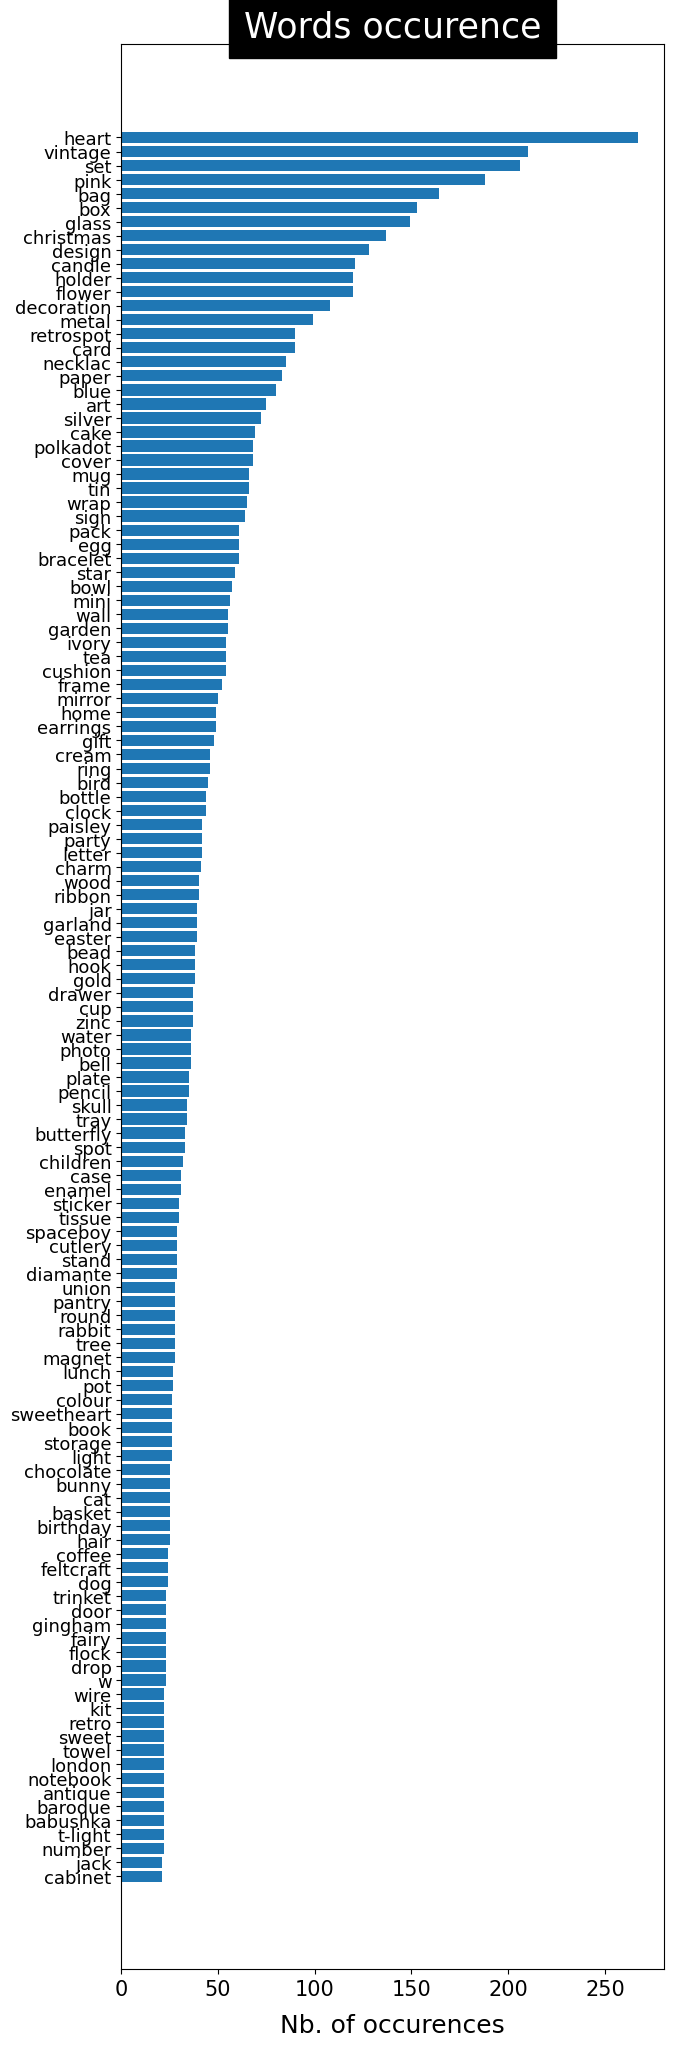

In [212]:
liste = sorted(list_products, key = lambda x:x[1], reverse = True)
#_______________________________
plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()
#_______________________________________________________________________________________
plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

In [213]:
list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])
#______________________________________________________    
list_products.sort(key = lambda x:x[1], reverse = True)
print('mots conservés:', len(list_products))

mots conservés: 190


In [214]:
liste_produits = df_cleaned['Description'].unique()
X = pd.DataFrame()
for key, occurence in list_products:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), liste_produits))

In [215]:
threshold = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    label_col.append(col)
    X.loc[:, col] = 0

for i, prod in enumerate(liste_produits):
    prix = df_cleaned[ df_cleaned['Description'] == prod]['UnitPrice'].mean()
    j = 0
    while prix > threshold[j]:
        j+=1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1

In [216]:
print("{:<8} {:<20} \n".format('gamme', 'nb. produits') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])    
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

gamme    nb. produits         
--------------------
0<.<1       963                 
1<.<2       1007                
2<.<3       675                 
3<.<5       605                 
5<.<10      472                 
.>10        154                 


In [220]:
# matrix = X.as_matrix()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
matrix = X.values
for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.10257728801812586
For n_clusters = 4 The average silhouette_score is : 0.1266631884301841
For n_clusters = 5 The average silhouette_score is : 0.1472056829567264
For n_clusters = 6 The average silhouette_score is : 0.14661353575721722
For n_clusters = 7 The average silhouette_score is : 0.14797212799255094
For n_clusters = 8 The average silhouette_score is : 0.15130844097408855
For n_clusters = 9 The average silhouette_score is : 0.14521052761185876


In [221]:
n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.145:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    
    #km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0)
    #clusters = km.fit_predict(matrix)
    #silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.1483169882730194


In [223]:
liste = pd.DataFrame(liste_produits)
liste_words = [word for (word, occurence) in list_products]

occurence = [dict() for _ in range(n_clusters)]

for i in range(n_clusters):
    liste_cluster = liste.loc[clusters == i]
    for word in liste_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']: continue
        occurence[i][word] = sum(liste_cluster.loc[:, 0].str.contains(word.upper()))

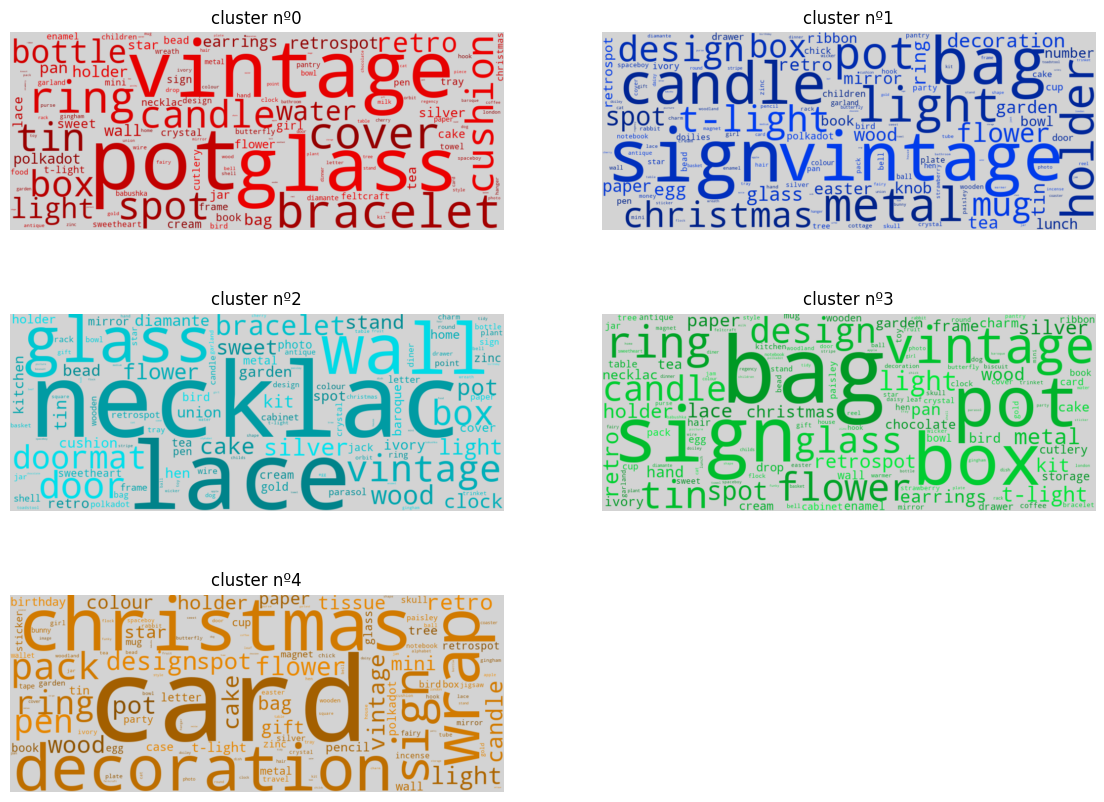

In [227]:
# !pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

#________________________________________________________________________
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
#________________________________________________________________________
def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]
    #________________________________________________________
    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey', 
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster nº{}'.format(increment-1))
#________________________________________________________________________
fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurence[i]

    tone = color[i] # define the color of the words
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1)  

In [229]:
preprocessed_data3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,ID,Country,InvoiceMonth,InvoiceYear,InvoiceDoW,InvoiceWeek,InvoiceQuarter,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,3824657,United Kingdom,12,2010,2,48,4,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,3824657,United Kingdom,12,2010,2,48,4,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,3824657,United Kingdom,12,2010,2,48,4,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,3824657,United Kingdom,12,2010,2,48,4,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,3824657,United Kingdom,12,2010,2,48,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387918,564434,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,48,2011-08-25 11:59:00,1.45,4004344,United Kingdom,8,2011,3,34,3,0
387919,564434,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,8,2011-08-25 11:59:00,2.95,4004344,United Kingdom,8,2011,3,34,3,0
387920,564434,21770,OPEN CLOSED METAL SIGN,2,2011-08-25 11:59:00,4.95,4004344,United Kingdom,8,2011,3,34,3,0
387921,564434,22671,FRENCH LAUNDRY SIGN BLUE METAL,12,2011-08-25 11:59:00,1.65,4004344,United Kingdom,8,2011,3,34,3,0


In [230]:
count_info = preprocessed_data3[["StockCode","Quantity"]].groupby("StockCode").sum().sort_values("Quantity", ascending=False).reset_index()
count_info.head(10).style.background_gradient(cmap='Blues')

,StockCode,Quantity
0,84077,54223
1,22197,49137
2,85099B,45975
3,85123A,36745
4,84879,35164
5,21212,33648
6,23084,27108
7,22492,26076
8,22616,25314
9,21977,24196


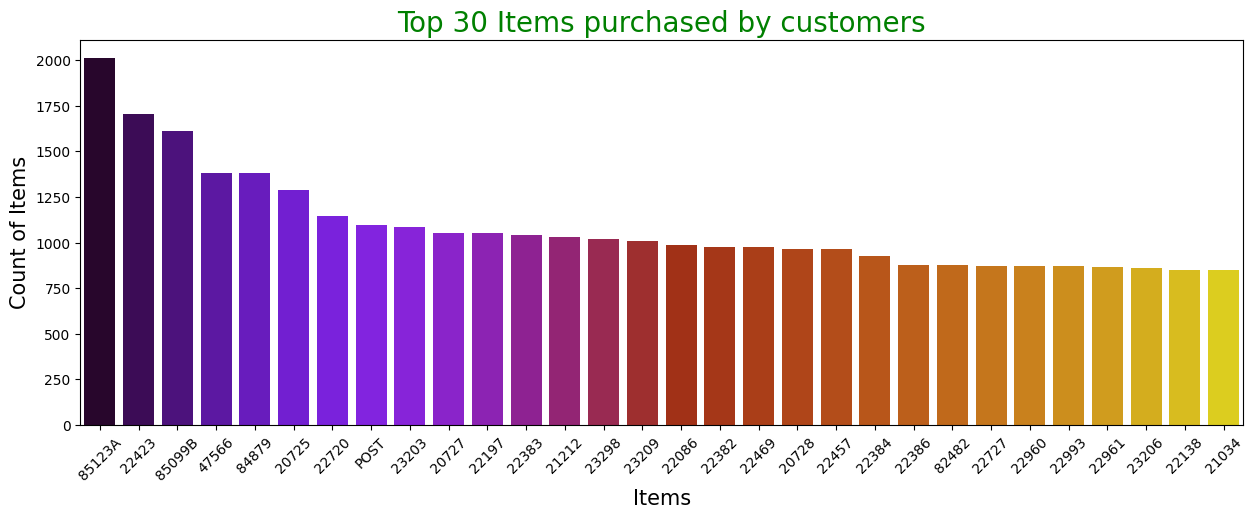

In [231]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.barplot(x = preprocessed_data3.StockCode.value_counts().head(30).index, y = preprocessed_data3.StockCode.value_counts().head(30).values, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 30 Items purchased by customers', color = 'green', size = 20)
plt.show()

In [226]:
transactions = []

for i in range(0,len(store_data)):
    transactions.append([str(store_data.values[i,j]) for j in range(0,20) if str(store_data.values[i,j])!='0'])

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 326.8 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 819.2 kB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.7 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [175]:
# idf = pd.read_csv(r'./data/Customer_invoice_data.csv', encoding='latin1')
# idf.columns = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
#        'UnitPrice', 'CustomerID', 'Country']

In [176]:
# idf
# idf['order_canceled'] = idf['InvoiceNo'].apply(lambda x:int('C' in x))
# display(idf[:5])
# n1 = idf['order_canceled'].sum()
# n2 = idf.shape[0]
# print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,3824657.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,3824657.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,3824657.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,3824657.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,3824657.0,United Kingdom,0


Number of orders canceled: 9288/541909 (1.71%) 


In [179]:
idf[idf['order_canceled'] == 1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
141,C536379,D,Discount,-1,12/01/2010 09:41,27.50,3308173.0,United Kingdom,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/01/2010 09:49,4.65,3354719.0,United Kingdom,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/01/2010 10:24,1.65,3862923.0,United Kingdom,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/01/2010 10:24,0.29,3862923.0,United Kingdom,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/01/2010 10:24,0.29,3862923.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/09/2011 09:57,0.83,3336575.0,United Kingdom,1
541541,C581499,M,Manual,-1,12/09/2011 10:28,224.69,3965189.0,United Kingdom,1
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/09/2011 11:57,10.95,3354719.0,United Kingdom,1
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/09/2011 11:58,1.25,3559541.0,United Kingdom,1


In [182]:
idf[((idf['Quantity'] < 0)) & (idf['StockCode'] != 'D')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,order_canceled
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/01/2010 09:49,4.65,3354719.0,United Kingdom,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/01/2010 10:24,1.65,3862923.0,United Kingdom,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/01/2010 10:24,0.29,3862923.0,United Kingdom,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/01/2010 10:24,0.29,3862923.0,United Kingdom,1
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/01/2010 10:24,0.29,3862923.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/09/2011 09:57,0.83,3336575.0,United Kingdom,1
541541,C581499,M,Manual,-1,12/09/2011 10:28,224.69,3965189.0,United Kingdom,1
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/09/2011 11:57,10.95,3354719.0,United Kingdom,1
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/09/2011 11:58,1.25,3559541.0,United Kingdom,1


In [183]:
list_special_codes = idf[idf['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0068', 'DCGS0067', 'DCGS0066P', 'B', 'CRUK'],
      dtype=object)

In [ ]:
len(preprocessed_data3.Country.unique())
# Data from 37 different countries
# We can check the count of invoices that we have for each country.
# Which item is purchased more in each country.
# Revenue that each country is generating. Whats the dates of purchase that has been done.

In [ ]:
# Lets see who regularly purchases with us
# Which customer generates lots of revenue for us
# Based on this information can be create segments, good customers, valued customers, happy customers etc.
# We can also check the time gap between one purchase and another made by the customer. Basically this will help us check if we have retained a customer or not

In [ ]:
#